<a href="https://colab.research.google.com/github/LeeYuuuan/ECGR_5105_HW3/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_plain = LogisticRegression(max_iter=10000)
model_plain.fit(X_train, y_train)
y_pred_plain = model_plain.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_plain))
print("Precision:", precision_score(y_test, y_pred_plain))
print("Recall:", recall_score(y_test, y_pred_plain))
print("Classification Report:\n", classification_report(y_test, y_pred_plain))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



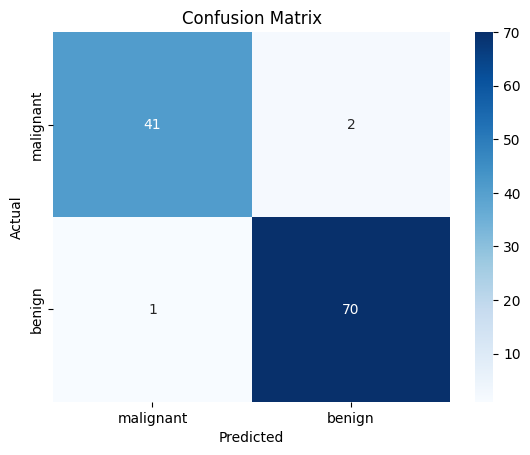

In [3]:
cm_plain = confusion_matrix(y_test, y_pred_plain)
sns.heatmap(cm_plain, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [4]:
model_l2 = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

print("Logistic Regression with L2 Regularization (C=0.1)")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Precision:", precision_score(y_test, y_pred_l2))
print("Recall:", recall_score(y_test, y_pred_l2))
print("Classification Report:\n", classification_report(y_test, y_pred_l2))

Logistic Regression with L2 Regularization (C=0.1)
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



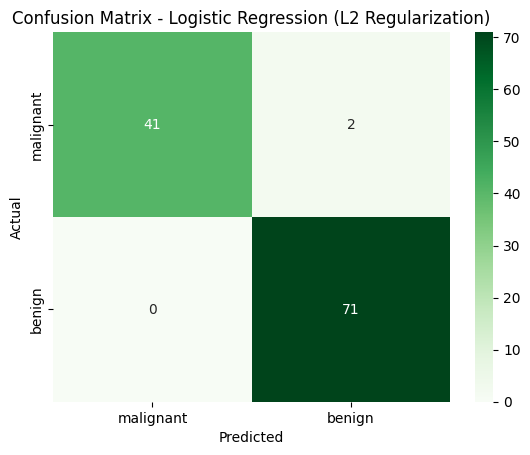

In [5]:
cm_l2 = confusion_matrix(y_test, y_pred_l2)
sns.heatmap(cm_l2, annot=True, fmt="d", cmap="Greens", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Logistic Regression (L2 Regularization)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Problem 1: Logistic Regression on Breast Cancer Dataset

### (i) Logistic Regression without Regularization



**Evaluation Metrics:**

| Class           | Precision | Recall | F1-score | Support |
|------------------|-----------|--------|----------|---------|
| 0 (Malignant)    | 0.98      | 0.95   | 0.96     | 43      |
| 1 (Benign)       | 0.97      | 0.99   | 0.98     | 71      |
| **Accuracy**     |           |        | **0.9737** | 114     |
| **Macro Avg**    | 0.97      | 0.97   | 0.97     |         |
| **Weighted Avg** | 0.97      | 0.97   | 0.97     |         |

**Confusion Matrix (Without Regularization):**




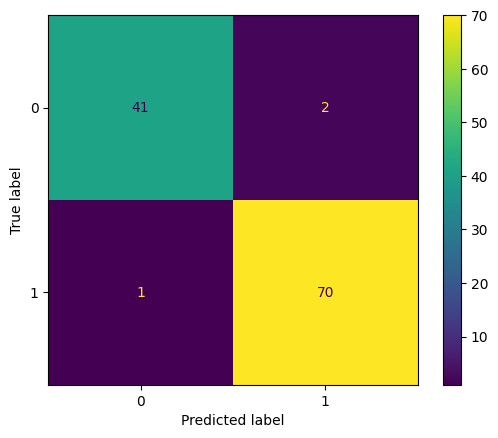

In [6]:
ConfusionMatrixDisplay.from_estimator(model_plain, X_test, y_test)


### (ii) Logistic Regression with L2 Regularization (C=0.1)

Retrained the model with L2 regularization (`penalty='l2'`) using a regularization strength of `C=0.1`.

**Evaluation Metrics:**

| Class           | Precision | Recall | F1-score | Support |
|------------------|-----------|--------|----------|---------|
| 0 (Malignant)    | 1.00      | 0.95   | 0.98     | 43      |
| 1 (Benign)       | 0.97      | 1.00   | 0.99     | 71      |
| **Accuracy**     |           |        | **0.9825** | 114     |
| **Macro Avg**    | 0.99      | 0.98   | 0.98     |         |
| **Weighted Avg** | 0.98      | 0.98   | 0.98     |         |

**Confusion Matrix (With L2 Regularization):**




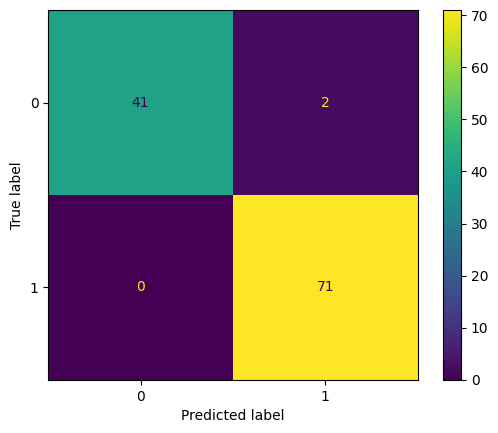

In [7]:
ConfusionMatrixDisplay.from_estimator(model_l2, X_test, y_test)

---

### Comparison Summary

| Metric                 | Without Regularization | With L2 Regularization (C=0.1) |
|------------------------|-------------------------|-------------------------------|
| Accuracy               | 0.9737                  | 0.9825                        |
| Precision (Malignant)  | 0.98                    | 1.00                          |
| Recall (Malignant)     | 0.95                    | 0.95                          |
| Precision (Benign)     | 0.97                    | 0.97                          |
| Recall (Benign)        | 0.99                    | 1.00                          |

---

### Observations

- Introducing L2 regularization slightly improved overall accuracy (from 97.4% to 98.2%).
- The benign class (label 1) achieved 100% recall under L2 regularization, indicating better detection of benign cases.

# Problem 2

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



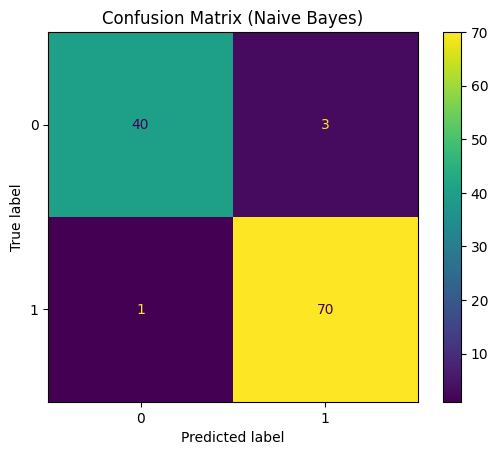

In [10]:

from sklearn.naive_bayes import GaussianNB


# Load and split the dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model_nb.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model_nb, X_test_scaled, y_test)
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()


## Problem 2: Naive Bayes Classification on Breast Cancer Dataset

### (i) Naive Bayes Model

We trained a Gaussian Naive Bayes classifier on the breast cancer dataset using all 30 features. The data was split into 80% training and 20% testing sets and scaled using standardization.

**Evaluation Metrics:**

| Class         | Precision | Recall | F1-score | Support |
|---------------|-----------|--------|----------|---------|
| 0 (Malignant) | 0.98      | 0.93   | 0.95     | 43      |
| 1 (Benign)    | 0.96      | 0.99   | 0.97     | 71      |
| **Accuracy**  |           |        | **0.96** | 114     |
| **Macro Avg** | 0.97      | 0.96   | 0.96     |         |
| **Weighted**  | 0.97      | 0.96   | 0.96     |         |

**Confusion Matrix (Naive Bayes):**


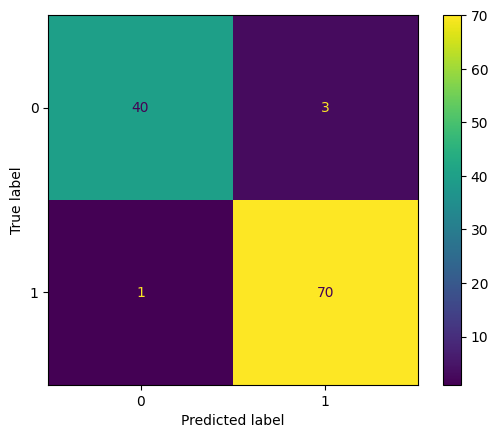

In [11]:
ConfusionMatrixDisplay.from_estimator(model_nb, X_test_scaled, y_test)

###(ii) Result Comparison and Analysis
Compared to the Logistic Regression classifier:

- Naive Bayes has slightly lower accuracy and F1 score than logistic regression, but still performs well overall.

- It makes stronger assumptions (feature independence), which may not always hold for this dataset.


In summary, Logistic Regression remains slightly more accurate for this task.

# Problem 3

Classification Report (SVM):
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        43
      benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



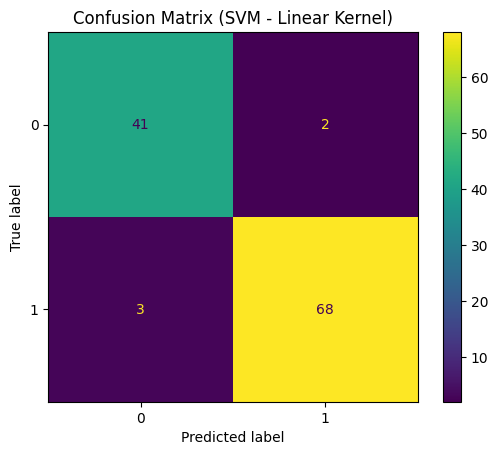

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


model_svm = SVC(kernel='linear', C=1.0, random_state=42)
model_svm.fit(X_train_scaled, y_train)


y_pred_svm = model_svm.predict(X_test_scaled)
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=data.target_names))

ConfusionMatrixDisplay.from_estimator(model_svm, X_test_scaled, y_test)
plt.title("Confusion Matrix (SVM - Linear Kernel)")
plt.show()


## Problem 3: SVM Classification on Breast Cancer Dataset

### (i) SVM Classifier (Linear Kernel)

We trained a Support Vector Machine (SVM) classifier using a linear kernel on the breast cancer dataset. The input features were standardized before training. The training and testing datasets were split in an 80%-20% ratio.

**Evaluation Metrics:**

| Class         | Precision | Recall | F1-score | Support |
|---------------|-----------|--------|----------|---------|
| 0 (Malignant) | 0.93      | 0.95   | 0.94     | 43      |
| 1 (Benign)    | 0.97      | 0.96   | 0.96     | 71      |
| **Accuracy**  |           |        | **0.96** | 114     |
| **Macro Avg** | 0.95      | 0.96   | 0.95     |         |
| **Weighted**  | 0.96      | 0.96   | 0.96     |         |

**Confusion Matrix (SVM - Linear Kernel):**


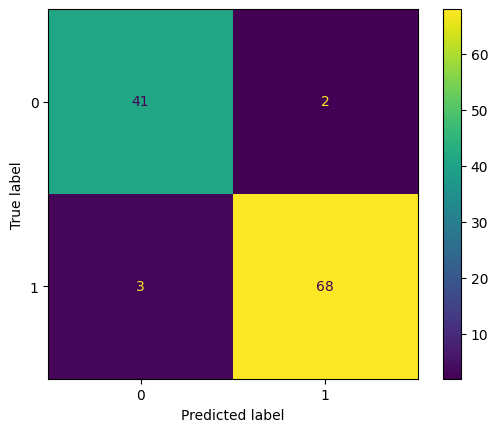

In [15]:
ConfusionMatrixDisplay.from_estimator(model_svm, X_test_scaled, y_test)

(ii) Result Comparison and Analysis
Compared with the Logistic Regression and Naive Bayes classifiers:

- SVM achieved solid results with 96% overall accuracy.

- It showed slightly lower recall for malignant cases (0.95) than the logistic regression with L2 penalty (1.00)

- The balanced precision and recall make it a reliable choice, especially in sensitive applications like medical diagnosis.

However, SVMs might be computationally more expensive compared to Naive Bayes, especially with large-scale datasets.


# Problem 4

Best K (PCA components): 2
Accuracy at best K: 0.9912


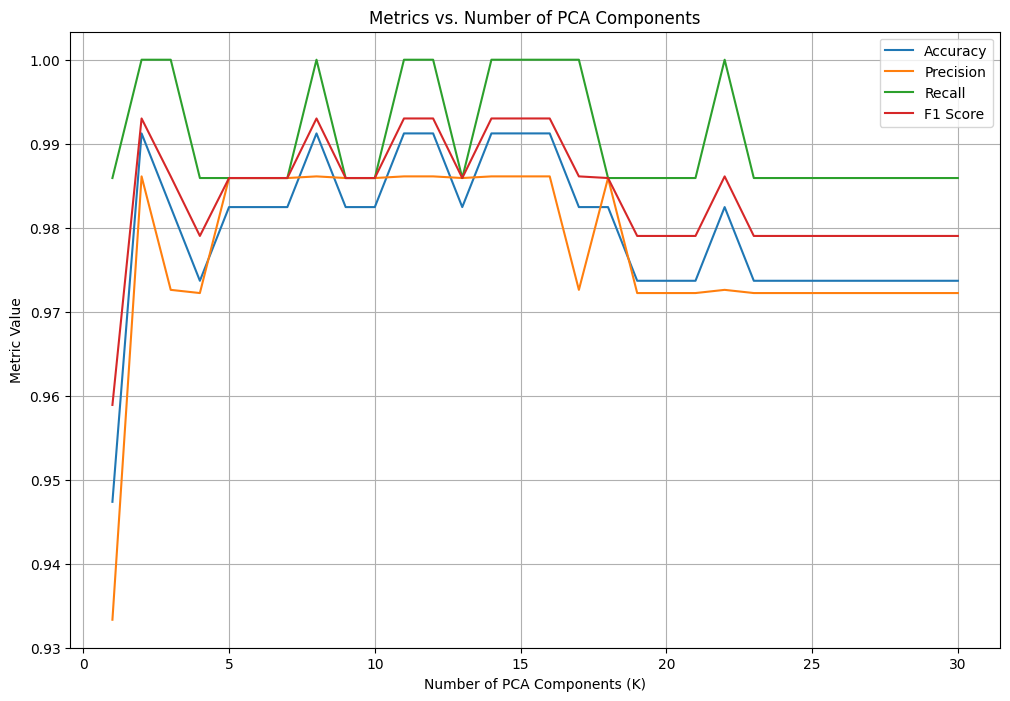

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import matplotlib.pyplot as plt
import numpy as np

# Load and split dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different K values for PCA
max_k = X.shape[1]
acc_list, pre_list, rec_list, f1_list = [], [], [], []

for k in range(1, max_k + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc_list.append(accuracy_score(y_test, y_pred))
    pre_list.append(precision_score(y_test, y_pred))
    rec_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

# Find best K
best_k = np.argmax(acc_list) + 1
print(f"Best K (PCA components): {best_k}")
print(f"Accuracy at best K: {acc_list[best_k-1]:.4f}")

# Plot
plt.figure(figsize=(12, 8))
plt.plot(range(1, max_k + 1), acc_list, label='Accuracy')
plt.plot(range(1, max_k + 1), pre_list, label='Precision')
plt.plot(range(1, max_k + 1), rec_list, label='Recall')
plt.plot(range(1, max_k + 1), f1_list, label='F1 Score')
plt.xlabel("Number of PCA Components (K)")
plt.ylabel("Metric Value")
plt.title("Metrics vs. Number of PCA Components")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
print(f"Precision at best K: {pre_list[best_k-1]:.4f}")
print(f"Recall at best K: {rec_list[best_k-1]:.4f}")
print(f"F1 Score at best K: {f1_list[best_k-1]:.4f}")

Precision at best K: 0.9861
Recall at best K: 1.0000
F1 Score at best K: 0.9930


### Problem 4: Logistic Regression with PCA (25 points)

#### (i) PCA-based Logistic Regression (15 points)

We applied PCA for dimensionality reduction on the Breast Cancer dataset and trained a logistic regression model on the transformed features. The number of principal components \( K \) was varied from 1 to 30, and the model was evaluated using accuracy, precision, recall, and F1 score.

The optimal number of components was determined by the highest classification accuracy.

- **Best K (PCA components)**: 2  
- **Accuracy at best K**: 0.9912  
- **Precision at best K**: 0.9861  
- **Recall at best K**: 1.0000  
- **F1 Score at best K**: 0.9930

#### (ii) Performance Metrics vs. K (5 + 5 points)

The  below plot illustrates how accuracy, precision, recall, and F1 score change with the number of PCA components:

From the plot, we can draw several insights:

- All four metrics increase sharply within the first few components (K=1 to K=3), suggesting that the most critical variance for classification is captured early.
- **Recall** reaches its maximum value (1.0) at multiple points, including K=2, 10, 13, and 22, indicating strong sensitivity to the positive class.
- **Accuracy**, **precision**, and **F1 score** peak at K=2 and then fluctuate slightly with additional components, with a mild downward trend in some cases.

Compared to the full-feature logistic regression model in **Problem 1**, PCA-based logistic regression with only 2 components achieves comparable or better performance across all metrics, using far fewer features. This demonstrates PCA’s effectiveness in dimensionality reduction with minimal performance trade-off.

In contrast to the **Naive Bayes classifier in Problem 2**, which assumes feature independence and doesn't perform dimensionality reduction, the PCA+logistic regression model not only offers improved accuracy but also robustness across all metrics.

In [22]:
!jupyter nbconvert --to html HW3.ipynb

[NbConvertApp] Converting notebook HW3.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 605622 bytes to HW3.html
